# Test download tigge function

In [1]:
import xarray as xr
import geopandas as gpd

from dhis2eo.data.ecmwf import tigge
from dhis2eo.data.cds import era5_land

In [2]:
# get bbox
org_units = gpd.read_file(f'../test_data/sierra-leone-districts.geojson')
org_units

,type,id,name,hasCoordinatesDown,hasCoordinatesUp,level,grandParentParentGraph,grandParentId,parentGraph,parentId,parentName,dimensions,weight,geometry
0,Polygon,O6uvpzGd5pu,Bo,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-11.5914 8.4875, -11.5906 8.4769, -1..."
1,Polygon,fdc6uOvgoji,Bombali,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-11.8091 9.2032, -11.8102 9.1944, -1..."
2,MultiPolygon,lc3eMKXaEfw,Bonthe,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-12.5568 7.3832, -12.5574 7.38..."
3,Polygon,jUb8gELQApl,Kailahun,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-10.7972 7.5866, -10.8002 7.5878, -1..."
4,MultiPolygon,PMa2VCrupOd,Kambia,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-13.1349 8.8471, -13.1343 8.84..."
5,Polygon,kJq2mPyFEHo,Kenema,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-11.3596 8.5317, -11.3513 8.5234, -1..."
6,Polygon,qhqAxPSTUXp,Koinadugu,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-10.585 9.0434, -10.5877 9.0432, -10..."
7,Polygon,Vth0fbpFcsO,Kono,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-10.585 9.0434, -10.5848 9.0432, -10..."
8,MultiPolygon,jmIPBj66vD6,Moyamba,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-12.6351 7.6613, -12.6346 7.66..."
9,MultiPolygon,TEQlaapDQoK,Port Loko,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-13.119 8.4718, -13.1174 8.470..."


## Real data

In [7]:
# get real data
start = '2021-03'
end = '2021-03'
files = era5_land.hourly.download(
    start=start, end=end,
    bbox=org_units.total_bounds, 
    dirname='../test_outputs', 
    prefix='tigge-vs-era5', 
    variables=['2m_temperature'],
)
print(files)
real = xr.open_mfdataset(files)
real

INFO - 2026-01-29 12:24:48,751 - dhis2eo.data.cds.era5_land.hourly - Month 2021-3
INFO - 2026-01-29 12:24:48,754 - dhis2eo.data.cds.era5_land.hourly - File already downloaded: C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\tigge-vs-era5_2021-03.nc
[WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/tigge-vs-era5_2021-03.nc')]


<xarray.Dataset> Size: 3MB
Dimensions:     (valid_time: 744, latitude: 31, longitude: 31)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 6kB 2021-03-01 ... 2021-03-31T23:...
  * latitude    (latitude) float64 248B 9.918 9.818 9.718 ... 7.118 7.018 6.917
  * longitude   (longitude) float64 248B -13.3 -13.2 -13.1 ... -10.5 -10.4 -10.3
    number      int64 8B ...
    expver      (valid_time) <U4 12kB dask.array<chunksize=(744,), meta=np.ndarray>
Data variables:
    t2m         (valid_time, latitude, longitude) float32 3MB dask.array<chunksize=(744, 31, 31), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-28T21:40 GRIB to CDM+CF via cfgrib-0.9.1...

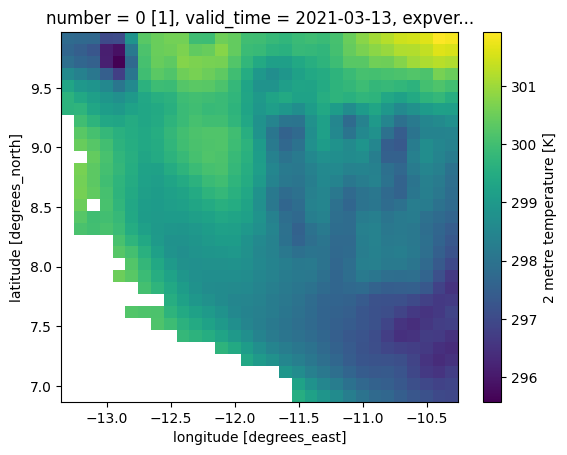

In [9]:
real['t2m'].sel(valid_time='2021-03-13T00').plot()

## Forecast data

In [ ]:
# get forecast data
start = '2021-03'
end = '2021-03'
files = tigge.hourly.download(
    start=start, end=end,
    bbox=org_units.total_bounds, 
    dirname='../test_outputs', 
    prefix='tigge-test', 
    variables=['2m_temperature'],
    resolution=0.25,
    overwrite=True,
)
# test open
print(files)
pred = xr.open_mfdataset(files, chunks=None)
pred

INFO - 2026-01-29 12:52:22,712 - dhis2eo.data.ecmwf.tigge.hourly - Month 2021-3
INFO - 2026-01-29 12:52:22,717 - dhis2eo.data.ecmwf.tigge.hourly - Downloading data from ECMWF API...
INFO - 2026-01-29 12:52:22,719 - dhis2eo.data.ecmwf.tigge.hourly - Request parameters: 
{"class": "ti", "dataset": "tigge", "date": "2021-03-01/to/2021-03-31", "expver": "prod", "grid": "0.25/0.25", "area": "10.0004/-13.3035/6.9176/-10.2658", "levtype": "sfc", "origin": "ecmf", "param": "167", "time": "00", "step": "0/6/12/18/24/30/36/42/48/54/60/66/72/78/84/90/96/102/108/114/120/126/132/138/144/150/156/162/168/174/180/186/192/198/204/210/216/222/228/234/240/246/252/258/264/270/276/282/288/294/300/306/312/318/324/330/336/342/348/354/360", "type": "cf", "target": "C:\\Users\\karimba\\AppData\\Local\\Temp\\tmp1vhe72_1.grib"}
2026-01-29 12:52:22 ECMWF API python library 1.6.5
2026-01-29 12:52:22 ECMWF API at https://api.ecmwf.int/v1
2026-01-29 12:52:22 Welcome Karim Bahgat
2026-01-29 12:52:23 In case of proble

<xarray.Dataset> Size: 1MB
Dimensions:            (time: 31, step: 61, latitude: 13, longitude: 13)
Coordinates:
  * time               (time) datetime64[ns] 248B 2021-03-01 ... 2021-03-31
  * step               (step) timedelta64[ns] 488B 0 days 00:00:00 ... 15 day...
  * latitude           (latitude) float64 104B 9.918 9.668 9.418 ... 7.168 6.918
  * longitude          (longitude) float64 104B -13.3 -13.05 ... -10.55 -10.3
    number             int64 8B ...
    heightAboveGround  float64 8B ...
    valid_time         (time, step) datetime64[ns] 15kB dask.array<chunksize=(31, 61), meta=np.ndarray>
Data variables:
    t2m                (time, step, latitude, longitude) float32 1MB dask.array<chunksize=(31, 61, 13, 13), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-29T12:53 GRIB to CDM+CF via cfgrib-0.9.1...

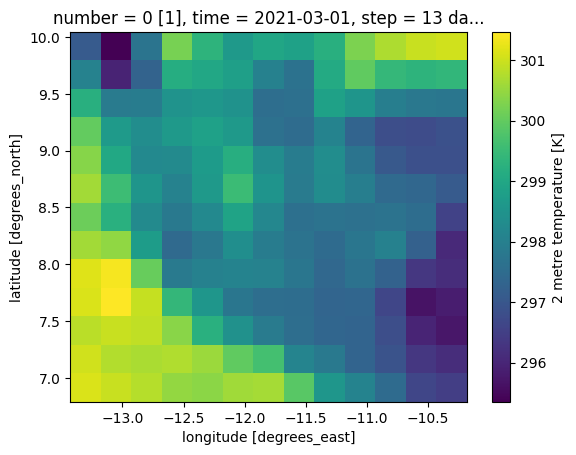

In [4]:
pred['t2m'].sel(time='2021-03-01').isel(step=4*13).plot()

## Subset to Freetown and compare

In [ ]:
pred_Freetown = pred.sel(longitude=13.2, latitude=8.48, method='nearest')
pred_Freetown

<xarray.Dataset> Size: 23kB
Dimensions:            (time: 31, step: 61)
Coordinates:
  * time               (time) datetime64[ns] 248B 2021-03-01 ... 2021-03-31
  * step               (step) timedelta64[ns] 488B 0 days 00:00:00 ... 15 day...
    number             int64 8B ...
    heightAboveGround  float64 8B ...
    latitude           float64 8B 8.518
    valid_time         (time, step) datetime64[ns] 15kB dask.array<chunksize=(31, 61), meta=np.ndarray>
    longitude          float64 8B -10.3
Data variables:
    t2m                (time, step) float32 8kB dask.array<chunksize=(31, 61), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-29T12:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [20]:
real_Freetown = real.sel(longitude=13.2, latitude=8.48, method='nearest')
real_Freetown

<xarray.Dataset> Size: 21kB
Dimensions:     (valid_time: 744)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 6kB 2021-03-01 ... 2021-03-31T23:...
    number      int64 8B ...
    latitude    float64 8B 8.518
    longitude   float64 8B -10.3
    expver      (valid_time) <U4 12kB dask.array<chunksize=(744,), meta=np.ndarray>
Data variables:
    t2m         (valid_time) float32 3kB dask.array<chunksize=(744,), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-28T21:40 GRIB to CDM+CF via cfgrib-0.9.1...

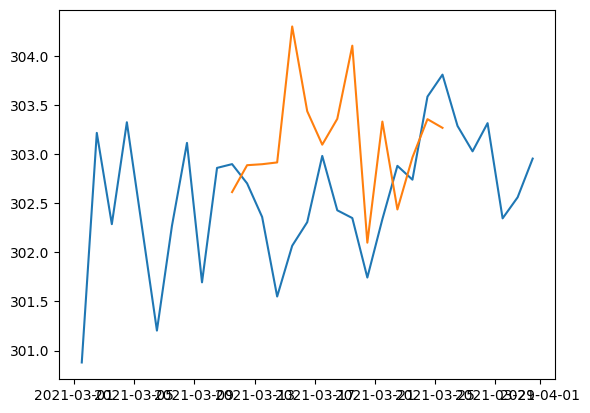

In [ ]:
# IDEA: MAYBE WILL BE MORE ACCURATE IF AGGREGATING TO DAILY INSTEAD OF EXACTLY AT MIDDAY

import matplotlib.pyplot as plt
fig,ax = plt.subplots()

# get real values at midday
real_Freetown.load()
real_valid_hour = real_Freetown.valid_time.dt.hour
midday_real = real_Freetown.where(real_valid_hour == 12, drop=True)
#print(midday_real)
# plot
ax.plot(midday_real.valid_time, midday_real['t2m'].values)

# get midday forecasts
timestamps = pred.time + ds.step
valid_hour = timestamps.dt.hour
midday_pred = pred_Freetown.where(valid_hour == 12, drop=True)
midday_timestamps = midday_pred.time + midday_pred.step
#print(midday_timestamps)
# plot from a starting point
subset = midday_pred['t2m'].sel(time='2021-03-11')
sel_timestamps = subset.time + subset.step
ax.plot(sel_timestamps, subset.values)